<a href="https://colab.research.google.com/github/lfzuloaga-dot/Algoritmo-Financiero-Simulaciones-Monte-Carlo/blob/main/Modelo_Aviones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías necesarias
import pandas as pd

# Función para calcular la pérdida total estacional
def calcular_perdida_estacional(N, Cr, Cm, dias, inflacion_anual, retorno_anual, IEM):
    # Convertir tasas anuales a diarias
    rd = (1 + inflacion_anual) ** (1 / 365) - 1
    id = (1 + retorno_anual) ** (1 / 365) - 1

    # Cálculo de pérdida
    costo_total = Cr + Cm
    ajuste_inflacion = (1 + rd) ** dias
    ajuste_oportunidad = ((1 + id) ** dias) - 1
    perdida_total = N * costo_total * (ajuste_inflacion + ajuste_oportunidad) * IEM

    return round(perdida_total, 2)

# Diccionario de IEM por mes
iem_por_mes = {
    "Enero": 0.7870,
    "Febrero": 0.8200,
    "Marzo": 0.9590,
    "Abril": 0.7900,
    "Mayo": 1.3520,
    "Junio": 0.9070,
    "Julio": 0.9140,
    "Agosto": 0.7220,
    "Septiembre": 0.9240,
    "Octubre": 1.0530,
    "Noviembre": 0.8950,
    "Diciembre": 1.8510
}

# Parámetros base
N = 2  # aviones no registrados
Cr = 1200  # costo de repuestos
Cm = 800   # costo de mano de obra
dias = 18  # días de capital inmovilizado
inflacion_anual = 1.80  # 180% anual
retorno_anual = 0.10    # 10% anual (S&P 500)

# Simulación por mes
resultados = []

for mes, iem in iem_por_mes.items():
    perdida = calcular_perdida_estacional(N, Cr, Cm, dias, inflacion_anual, retorno_anual, iem)
    resultados.append({"Mes": mes, "IEM": iem, "Pérdida Estacional (USD)": perdida})

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar resultados
print(df_resultados)

           Mes    IEM  Pérdida Estacional (USD)
0        Enero  0.787                   3326.80
1      Febrero  0.820                   3466.30
2        Marzo  0.959                   4053.88
3        Abril  0.790                   3339.48
4         Mayo  1.352                   5715.16
5        Junio  0.907                   3834.06
6        Julio  0.914                   3863.65
7       Agosto  0.722                   3052.03
8   Septiembre  0.924                   3905.93
9      Octubre  1.053                   4451.23
10   Noviembre  0.895                   3783.34
11   Diciembre  1.851                   7824.53



📊 Estadísticas por mes (Monte Carlo):
                    mean         std           min           max    CV (%)
Mes                                                                       
Diciembre   84943.280597  136.117423  84721.825105  85176.556246  0.160245
Octubre     48465.892200   79.869645  48336.916241  48596.357075  0.164796
Marzo       42809.701697   69.155595  42694.069553  42923.223291  0.161542
Septiembre  42111.640148   67.597139  41998.604315  42224.025252  0.160519
Noviembre   40680.604378   65.162669  40570.193678  40787.947844  0.160181
Mayo        40511.300503   65.648257  40403.615178  40620.475260  0.162049
Julio       37168.680963   60.193413  37067.880715  37266.836765  0.161947
Febrero     36884.797573   58.664058  36784.697265  36982.133372  0.159047
Enero       35099.974413   55.829834  35006.471777  35194.363537  0.159059
Junio       34701.591533   54.261909  34606.683377  34792.429335  0.156367
Agosto      29011.815833   47.103833  28934.685452  29089.987

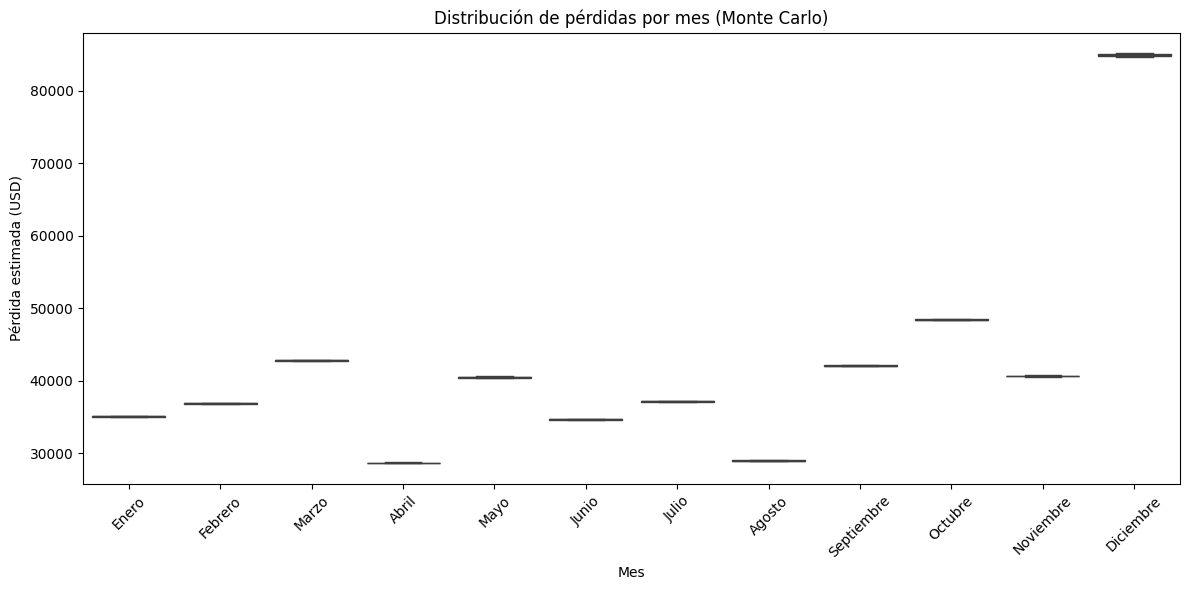

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros base del modelo

Cr = 20000  # Costo de repuestos por avión
Cm = 800    # Costo de mano de obra por avión
N = 2       # Número de aviones no registrados
inflacion_anual = 0.027  # 2.7% anual
retorno_anual = 0.053    # 5.3% anual

# Convertir tasas a diarias
rd = (1 + inflacion_anual) ** (1/365) - 1
id = (1 + retorno_anual) ** (1/365) - 1

# Índices estacionales actualizados
iem_dict = {
    'Enero': 0.8406, 'Febrero': 0.8833, 'Marzo': 1.0252, 'Abril': 0.6868,
    'Mayo': 0.9702, 'Junio': 0.8310, 'Julio': 0.8901, 'Agosto': 0.6948,
    'Septiembre': 1.0085, 'Octubre': 1.1607, 'Noviembre': 0.9742, 'Diciembre': 2.0344
}

# Simulación Monte Carlo
n_simulaciones = 1000
resultados = []

for mes, iem in iem_dict.items():
    for _ in range(n_simulaciones):
        dias = np.random.randint(5, 31)  # Días aleatorios entre 5 y 30
        costo_total = Cr + Cm
        ajuste_inflacion = (1 + rd) ** dias
        ajuste_oportunidad = ((1 + id) ** dias) - 1
        factor_total = ajuste_inflacion + ajuste_oportunidad
        perdida = N * costo_total * factor_total * iem
        resultados.append({
            'Mes': mes,
            'Días': dias,
            'Pérdida': perdida
        })


df_resultados = pd.DataFrame(resultados)

# Estadísticas por mes con coeficiente de variación en porcentaje
estadisticas = df_resultados.groupby('Mes')['Pérdida'].agg(['mean', 'std', 'min', 'max'])
estadisticas['CV (%)'] = (estadisticas['std'] / estadisticas['mean']) * 100
estadisticas = estadisticas.sort_values(by='mean', ascending=False)

print("\n📊 Estadísticas por mes (Monte Carlo):")
print(estadisticas)

# Gráfico de distribución
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resultados, x='Mes', y='Pérdida')
plt.xticks(rotation=45)
plt.title('Distribución de pérdidas por mes (Monte Carlo)')
plt.ylabel('Pérdida estimada (USD)')
plt.tight_layout()
plt.show()
